In [3]:
import matplotlib.pyplot as plt

In [4]:
!pip install matplotlib deap

import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.0 MB/s eta 0:00:00


In [5]:

num_locations = 10 # Define the number of locations (eg 10)

locations =  [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
            # Create a list of tuples representing location coordinates -
            # try to use a random number generator
            # (x, y) could be between 0 and 100

depot = (50, 50) # Define the coordinates for the depot

num_vehicles = 3 # Define the number of vehicles - (eg 3)

In [6]:
#SOLUTION

num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

In [7]:


# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [8]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [9]:
#SOLUTION - TASK 3 and 4

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [10]:

# TASK 5 and 6

def evalVRP(individual):
    # TODO: Task 5 - Write the fitness evaluation function
    #              - Return (total distance, standard deviation)
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty


#TASK 6 - Register the evaluate function in the toolbox

In [11]:
#SOLUTION CODE


#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

In [12]:
# TODO: Task 7 - Configure the genetic operators

toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [13]:
#HINTS

#Select is simpler, try tournament selection or roulette selection. Look up how to add that.

#FOR mutation - mutShuffleIndexes

#For mate - cxPartialyMatched, cxOrdered

In [14]:
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

<ipython-input-15-d912c8587313>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", num_vehicles)  # Use a color map for multiple vehicles


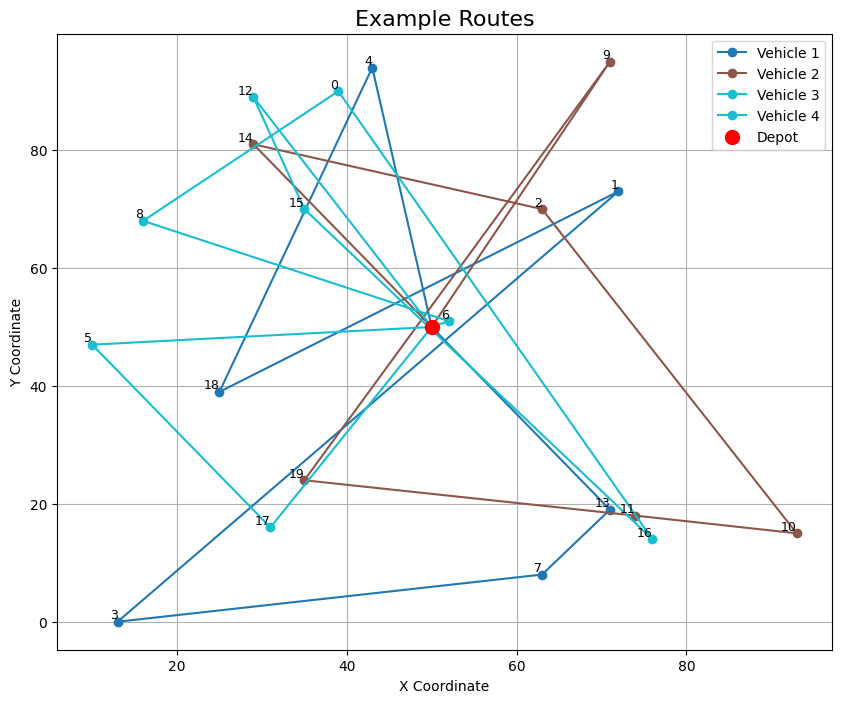

In [15]:
# Plotting Function
#TODO: Task 5 - Write a function to visualize the routes - just plot the points and lines for each vehicle
import matplotlib.pyplot as plt

# Task 5 - Plotting Function
def plot_routes(individual, title="Routes"):
    """
    Visualize the routes taken by the vehicles.
    Each vehicle's route is shown in a different color.
    The depot is marked separately.
    """
    depot_coords = depot  # Starting point for all vehicles

    # Split routes into segments for each vehicle
    routes = [[]]  # List of routes (one per vehicle)
    for loc_idx in individual:
        if len(routes[-1]) < num_locations // num_vehicles:  # Basic split logic
            routes[-1].append(loc_idx)
        else:
            routes.append([loc_idx])

    # Add depot to start and end of each route
    for route in routes:
        route.insert(0, -1)  # Depot at the start
        route.append(-1)  # Depot at the end

    # Prepare plot
    plt.figure(figsize=(10, 8))
    plt.title(title, fontsize=16)

    # Plot routes
    colors = plt.cm.get_cmap("tab10", num_vehicles)  # Use a color map for multiple vehicles
    for i, route in enumerate(routes):
        x_coords = [depot[0] if idx == -1 else locations[idx][0] for idx in route]
        y_coords = [depot[1] if idx == -1 else locations[idx][1] for idx in route]
        plt.plot(x_coords, y_coords, marker='o', label=f"Vehicle {i + 1}", color=colors(i))

    # Highlight the depot
    plt.scatter(depot[0], depot[1], color='red', s=100, label="Depot", zorder=5)

    # Label locations
    for idx, (x, y) in enumerate(locations):
        plt.text(x, y, str(idx), fontsize=9, ha="right", va="bottom")

    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
example_individual = toolbox.individual()
plot_routes(example_individual, title="Example Routes")


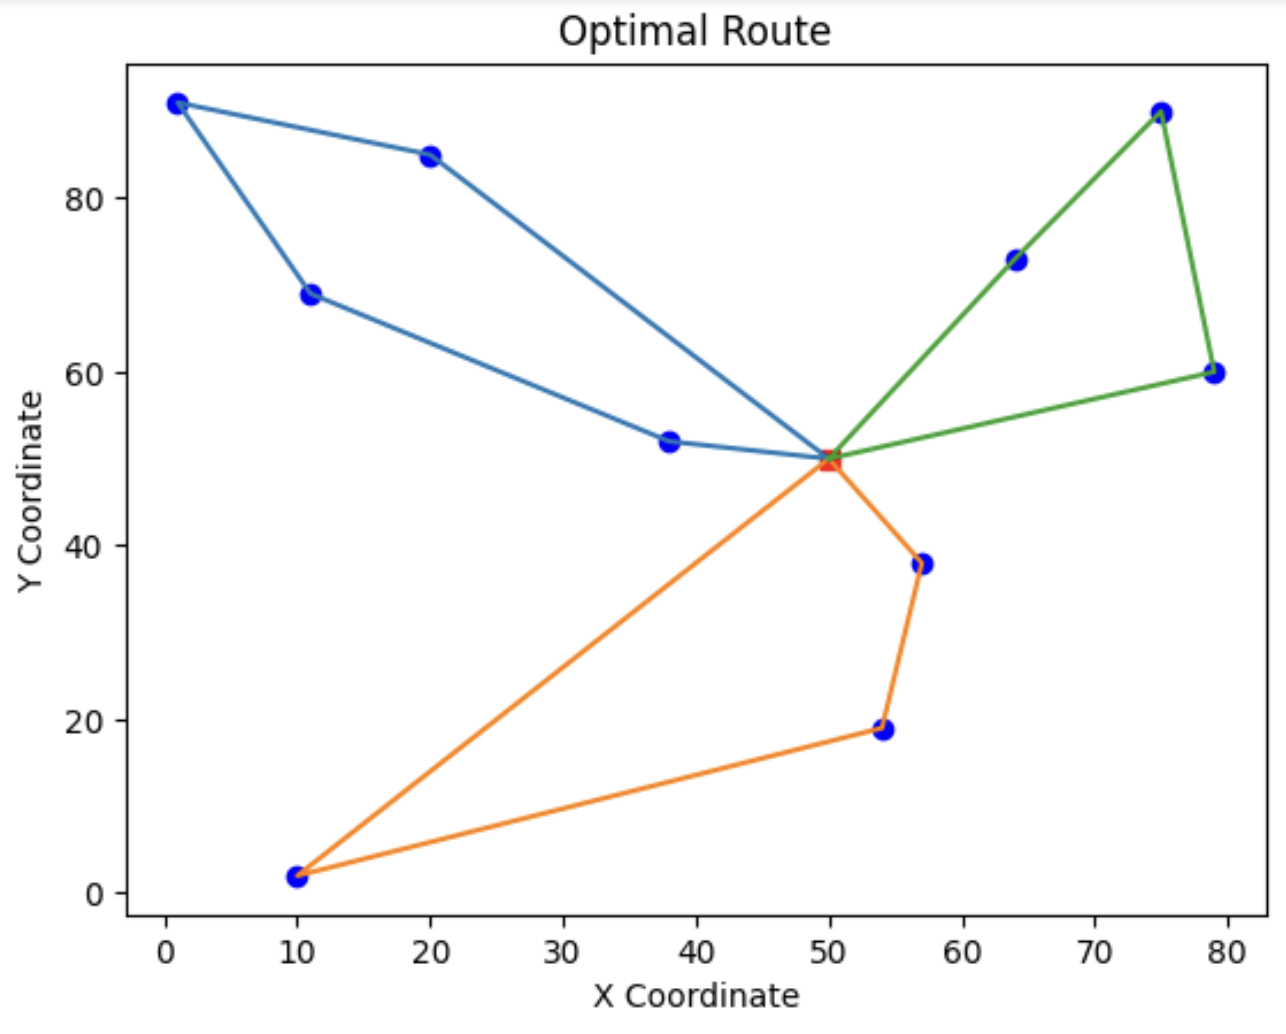